<h1 style="font-size:42px; text-align:center; margin-bottom:30px;"><span style="color:SteelBlue">Step 4:</span> Model Training</h1>

Essential 3 steps completed steps leading up to training our model: 
1. Exploratory Analysis
2. Data Cleaning
3. Feature Engineering


The essential modeling and training steps:

1. [Split our dataset](#split)
2. [Build model pipelines](#pipelines)
3. [Declare hyperparameters to tune](#hyperparameters)
4. [Fit and tune models with cross-validation](#fit-tune)
5. [Evaluate metrics](#evaluate)
6. [Area under ROC curve](#auroc)

Again, we'll split the dataset, set up pipelines, declare hyperparameters, and tune models using cross-validation. We'll use area under ROC curve as the performance metric for our classification models.

In [120]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Pickle for saving model files
import pickle

import the algorithms and all the other good things

In [36]:
# Import Logistic Regression
from sklearn.linear_model import LogisticRegression
# Import RandomForestClassifier and GradientBoostingClassifer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [37]:
# Function for splitting training and test set
from sklearn.model_selection import train_test_split
# Function for creating model pipelines
from sklearn.pipeline import make_pipeline
# For standardization
from sklearn.preprocessing import StandardScaler
# Helper for cross-validation
from sklearn.model_selection import GridSearchCV

Get our analytical base table

In [38]:
# Load analytical base table from Module 2
abt = pd.read_csv('project_files/analytical_base_table.csv')

# 1. Splitting the dataset

In [39]:
# y object for target variable
y = abt['status']

# X object for input features
X = abt.drop('status', axis=1)

* **Important:** We pass in the argument <code style="color:steelblue">stratify =<span style="color:crimson"> y</code> in order to make sure the target variable's classes are balanced in each subset of data! This is **stratified random sampling**.
* Then, print the number of observations in each subset to check that it was done correctly.

In [40]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Print number of observations in X_train, X_test, y_train, and y_test
print(len(X_train), len(X_test), len(y_train), len(y_test))

11254 2814 11254 2814


# 2. Build our model pipelines

Set up preprocessing pipelines for each of our algorithms.

**Our <span style="color:royalblue">pipeline dictionary</span> with pipelines for each algorithm**. 

**KEYS**:
* <code style="color:crimson">'l1'</code> for $L_1$-regularized logistic regression
* <code style="color:crimson">'l2'</code> for $L_2$-regularized logistic regression
* <code style="color:crimson">'rf'</code> for random forest
* <code style="color:crimson">'gb'</code> for gradient boosted tree.

Note: Each pipeline tandardizes the data first.


In [46]:
# Pipeline dictionary
pipeline = {'l1' : make_pipeline(StandardScaler(), LogisticRegression(penalty='l1')),
            'l2' : make_pipeline(StandardScaler(), LogisticRegression(penalty='l2')),
            'rf' : make_pipeline(StandardScaler(), RandomForestClassifier()),
            'gb' : make_pipeline(StandardScaler(), GradientBoostingClassifier())
           }

# 3. Declare hyperparameters to tune

**listing hyperparameters to be tuned for each of our algorithms in the pipeline.**

In [65]:
# Logistic Regression 'L1' hyperparamters
print(pipeline['l1'].get_params())
l1_hyperparameters = {'logisticregression__C': np.linspace(1e-3,1e3,10)}

{'memory': None, 'steps': [('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))], 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True), 'logisticregression': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False), 'standardscaler__copy': True, 'standardscaler__with_mean': True, 'standardscaler__with_std': True, 'logisticregression__C': 1.0, 'logisticregression__class_weight': None, 'logisticregression__dual': False, 'logisticregression__fit_intercept

In [68]:
# Logistic Regression 'L2' hyperparameters
print(pipeline['l2'].get_params())
l2_hyperparameters = {'logisticregression__C': np.linspace(1e-3,1e3,10)}

{'memory': None, 'steps': [('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))], 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True), 'logisticregression': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False), 'standardscaler__copy': True, 'standardscaler__with_mean': True, 'standardscaler__with_std': True, 'logisticregression__C': 1.0, 'logisticregression__class_weight': None, 'logisticregression__dual': False, 'logisticregression__fit_intercept

**Declare the hyperparameter grid for the random forest.**

In [86]:
# Random Forest hyperparameters
print(pipeline['rf'].get_params())
rf_hyperparameters = {'randomforestclassifier__n_estimators': [100,200,300],  'randomforestclassifier__max_features': ['sqrt','auto','log2']}

{'memory': None, 'steps': [('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestclassifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))], 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True), 'randomforestclassifier': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
          

**Declare the hyperparameter grid for the boosted tree.**

In [82]:
# Boosted Tree hyperparameters
print(pipeline['gb'].get_params())
gb_hyperparameters = {'gradientboostingclassifier__n_estimators': [100, 200,300], 'gradientboostingclassifier__max_depth': [1,2,3,4,5],'gradientboostingclassifier__learning_rate': [0.01,0.05,0.1,0.15,0.2]}

{'memory': None, 'steps': [('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('gradientboostingclassifier', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False))], 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True), 'gradientboostingclassifier': GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min

### Create our hyperparameter dictionary

In [87]:
# Create hyperparameters dictionary
hyperparameters = {'l1':l1_hyperparameters, 'l2':l2_hyperparameters, 'rf':rf_hyperparameters,'gb':gb_hyperparameters}

# 4. Fit and tune models with cross-validation

Time to to tune our models with **cross-validation**.

* The keys are the same as those in the <code style="color:SteelBlue">pipelines</code> and <code style="color:SteelBlue">hyperparameters</code> dictionaries -  for ease of use. 
* The values are <code style="color:steelblue">GridSearchCV</code> objects that have been fitted to <code style="color:steelblue">X_train</code> and <code style="color:steelblue">y_train</code>.
* After fitting each model, we print <code style="color:crimson">'{name} has been fitted.'</code> to track the progress.

**HIGHLY IMPORTANT: It will take some time. Be patient, take a chill pill, look out the window**

In [88]:
# Create empty dictionary called fitted_models to store our models tuned using cross-validation
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, algo in pipeline.items():
    # Create cross-validation object from pipeline and hyperparameters
    model = GridSearchCV(algo, hyperparameters[name], cv=10)
    # Fit model on X_train, y_train
    model.fit(X_train, y_train)
    # Store model in fitted_models with appropriate key 
    fitted_models[name] = model
    # Print '{name} has been fitted'
    print(name, 'has been fitted!')

l1 has been fitted!
l2 has been fitted!
rf has been fitted!
gb has been fitted!


# 5. Evaluate metrics

Time to evaluate our models and pick the best one.

In [89]:
# Display best_score_ for each fitted model
for name, model in fitted_models.items():
    print(name, 'best score:', model.best_score_)

l1 best score: 0.848676026302
l2 best score: 0.848676026302
rf best score: 0.977785676204
gb best score: 0.976363959481


Scores are holdout accuracy scores. For classification problems, the default scoring metric is accuracy.
- Accuracy is simply the percent of observations correctly classified by the model.

However, straight accuracy is not always the best way to evaluate a classification model - if our target class is an imblanced class, then strongly predominant value might be positive, so even poor model's will score a "high" accuracy.

# 6. Area under ROC curve

**Area under ROC curve** is a strong,reliable metric for classification tasks.

Area under ROC curve is equivalent to the probability that a randomly chosen 'Left' observation ranks higher (has a higher predicted probability) than a randomly chosen 'Employed' observation.

Basically, the ROC curve isa saying if you grabbed two observations and exactly one of them was the positive class and one of them was the negative class, what's the likelihood that your model can distinguish the two?
- Since it's choosing one random positve and one random negative, it doesn't care about imbalanced classes.

In [101]:
# Classification metrics
from sklearn.metrics import confusion_matrix, roc_curve, auc

Firstly lets take a look at our **confusion matrix** 

In [108]:
# Predict classes using L1-regularized logistic regression 
l1_pred = fitted_models['l1'].predict(X_test)
# Display first 10 predictions for later comparison withtheir predicted probabalities
l1_pred[:10]

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0])

In [109]:
# Display confusion matrix for y_test and pred
cm = pd.DataFrame(confusion_matrix(y_test, l1_pred))
cm.head()

,0,1
0,1937,183
1,266,428


Not so bueno....

Our threshold of 0.5 seems to be miscallsifying many points. WE must find a best threshold that will maximize our model's TPR (True Positive Rate) and minimize it's FPR (False Positive Rate). AS well in predicting employee retention, there is no need to stress one classification or the other as in the case of terminal illness diagnostic.

That why we use ze area under the ROC curve :)

ROC curve:

The ROC curve is a way to visualize the relationship between TPR (True Positive Rate) and FPR (False Positive Rate) across our model's threshold values.

Lets calculate and plot our L1-regularized logistic regression model's ROC.

In [110]:
# Predict PROBABILITIES using L1-regularized logistic regression
pred_l1 = fitted_models['l1'].predict_proba(X_test)

# Get just the prediction for the positive class (1)
pred_l1 = [pred[1] for pred in pred_l1]

# Display first 10 predictions
pred_l1[:10]

[0.093680773747525981,
 0.0015442983341427672,
 0.010302337849146226,
 0.72428475318602648,
 0.79176777554682842,
 0.052164626646663347,
 0.040189205655579596,
 0.028762396204263994,
 0.061010721250835731,
 0.28444946853333514]

We calculate the ROC curve for L1-regularized logistic regression model using the <code style="color:steelblue">roc_curve()</code> function that we imported earlier.

<code style="color:steelblue">roc_curve()</code> returns 3 lists of equal length:
- False positive rates
- True positive rates
- And the thresholds at which the those were calculated.

In [112]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresh = roc_curve(y_test, pred_l1)

Converting into a data frame for convenience and look at the last 10:

In [114]:
# Store fpr, tpr, thresholds in DataFrame and display last 10
roc = pd.DataFrame({'FPR': fpr, 'TPR': tpr, 'Thresholds': thresh})
roc.tail(10)

,FPR,TPR,Thresholds
606,0.755660,0.994236,0.010753
607,0.783962,0.994236,0.008737
608,0.783962,0.995677,0.008724
609,0.852830,0.995677,0.005025
610,0.852830,0.997118,0.005015
611,0.915094,0.997118,0.002521
612,0.915094,0.998559,0.002506
613,0.935849,0.998559,0.001756
614,0.935849,1.000000,0.001741
615,1.000000,1.000000,0.000066


Decrease the threshold, both the false positive rate (no bueno) **and** the true positive rate (bueno) increase.

Now, plotting our model's entire curve ROC curve  to visualize the relationship between TPR (True Positive Rate) and FPR (False Positive Rate) across our model's threshold values.

Also plot an ROC curve of a hypothetical model that makes completely random predictions for heuristic reasons.

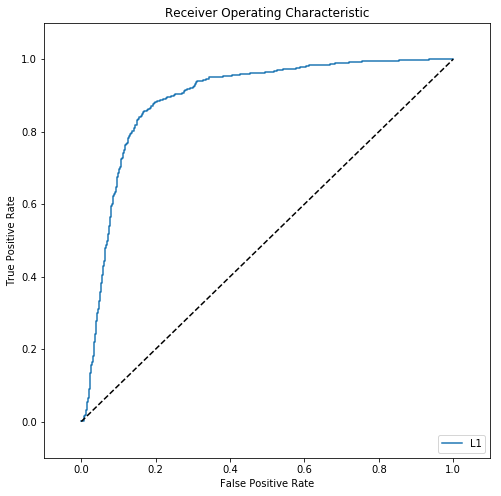

In [123]:
# Initialize figure
plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='L1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
# ROC curve of a completely random model
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Basically, we want our model's curve, the blue line, to sit as far above that dotted black line as possible.

**AUROC : Aread Under ROC curve**
or area under that blue line.

- The AUROC for a completely random model will be 0.5 (worst case).
- The maximum AUROC possible is 1.0.

To calculate AUROC, we use the <code style="color:steelblue">auc()</code> function we imported earlier in conjunction with the <code style="color:steelblue">roc_curve()</code> function.

In [126]:
# Calculate ROC curve again because repetition is the mother of learning
fpr, tpr, thresholds = roc_curve(y_test, pred_l1)
# Calculate AUROC
print( auc(fpr, tpr))

0.889708960905


So our L1-regularized logistic regression has a 88.97% chance of distinguishing between a positive observation and a negative one... not bad!

That's the intuition behind AUROC.

Calculating the AUROC for each of our fitted models on the test set.

In [133]:
# AUROC's of each of our fitted models

for name, model in fitted_models.items():
    pred = model.predict_proba(X_test)
    pred2 = [p[1] for p in pred]
    fpr, tpr, thresh = roc_curve(y_test, pred2)
    print(name, ':', auc(fpr, tpr))



l1 : 0.889708960905
l2 : 0.889710320265
rf : 0.990653036811
gb : 0.989602930781


Our random forest obtained the highest AUROC score as well as previously the highest cross-validation score after tuning our hyperparamters. Seems like Random forest is our best model.

**Save the winning <code style="color:steelblue">Pipeline</code> object into a pickle file.**
* Save the <code style="color:steelblue">fitted model</code>, not the <code style="color:steelblue">GridSearchCV</code> object!


In [135]:
# Save winning model as final_model.pkl
with open('project2_final_model.pkl', 'wb') as f:
    pickle.dump(fitted_models['rf'].best_estimator_, f)


Recap: essential steps to training a model:
* Split the dataset into training and test sets.
* Set up model pipelines and hyperparameter grids.
* Tune your models using cross-validation.
* for classification, evaluate your models with the AUROC metric
* And finally, save the winning model.
